# Exploratory Data Analysis using Python
#### by ***Wayne Omondi***

## 1.0: Introduction

In this modern times where every business is highly dependent on its data *(Data is King)* to make better decisions for developing business, data analysis plays an important role in helping different business entities to get an idea on their performance and any opportunities to increase gains and minimise losses. Objective is to gain valuable insights on the overall performance of the store.

For our analysis we will be using the SuperStore dataset

### 1.1: Why Python?

**Python** is a popular choice for Data Analysis due to the many helpful anaytics libraries and even for scientific computing, machine learning and more complex tasks. Combined with Python's overall strength for general-purpose software engineering, it is an excellent tool for building data applications.


### 1.2: Our Tools
For our EDA, we will be using the following libraries:
-  **pandas** (a library that makes working with structured and tabular data fast, easy and expressive).
-  **numpy** (a library that provides the data structures and algorithms useful for numerical computing).
-  **matplotlip** (library for plots and two-dimensional visualizations).
-  **seaborn** (statistical data visualization library).

Let's not forget *Jupyter* library that allows as to present our code in form of an interactive notebook/document with text, plots and other outputs (even a terminal - through magic commands)
All these have already been install in our python virtual environment.

### 1.3: Importing Our Libraries and Some Necessary Functions

Since we are using the pandas and numpy libraries for our data processing and manipulation and the matplotlib and seaborn libraries for data vizualization, to start off we have to import them

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Additional this being a Sales dataset we will likely be working with dates and/or time. So inorder to be able to manipulate those we will make an additional import of the 'datetime' function in Python

In [2]:
from datetime import datetime, date, time

We will also be disabling the warnings in the jupyter, setting the filter to never display warnings.
[More on Warnings](https://www.geeksforgeeks.org/warnings-in-python/).

In [3]:
import warnings 
warnings.filterwarnings("ignore")

## 2.0: Our Data

We have to load our data, view it, process it and explore it, before we can proceed to analyse and query it.

### 2.1: Loading Our Data

In our case our data is stored in a csv format so we will use the .read_csv() method.

In [4]:
store_df = pd.read_csv('data/SuperStoreSales_Whole.csv') #loading our dataset into a dataframe named store_df

### 2.2: Viewing Our Data 

We have to see what we are working with and whether any data cleaning is necessary. In this step we display our dataset, get to know how many columns and rows are present, how much data is missing, present datatypes in each column, unique features and last but least a statistical description of our dataset.
While doing this we will also get to understand more about the store, for example, what products they sells, who they sell to and where, before we dive into their performance.

In [5]:
store_df.head(5) #display the first five rows of our dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
store_df.shape #view the shape of our dataset - total rows and columns.

(9800, 21)

Our dataset has 9800 rows and 21 columns. Depending on our objective with our EDA we could drop some columns from the analysis, for example the *'Customer Name'* columns is not necessary. In certain case personal information is often excluded from a data analysis, unless in our case if the store intends to award the most loyal and/or top customer. In that case we could still drop the *'Customer Name'* column and retain the *'Customer ID'* column for that query.

In [7]:
store_df = store_df.drop(columns = 'Customer Name') #remove 'Customer Name' column from the 'store_df' dataframe
store_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,3,0.80,-5.8869
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2,0.20,1.5552
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2,0.40,-43.1178
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,4,0.40,2.6376


In [8]:
store_df.columns #view all the columns, incase we need to rename any

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
store_df.info() #view information on our dataframe interms of index range and datatype for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9800 non-null   int64  
 1   Order ID      9800 non-null   object 
 2   Order Date    9800 non-null   object 
 3   Ship Date     9800 non-null   object 
 4   Ship Mode     9800 non-null   object 
 5   Customer ID   9800 non-null   object 
 6   Segment       9800 non-null   object 
 7   Country       9800 non-null   object 
 8   City          9800 non-null   object 
 9   State         9800 non-null   object 
 10  Postal Code   9789 non-null   float64
 11  Region        9800 non-null   object 
 12  Product ID    9800 non-null   object 
 13  Category      9800 non-null   object 
 14  Sub-Category  9800 non-null   object 
 15  Product Name  9800 non-null   object 
 16  Sales         9800 non-null   float64
 17  Quantity      9800 non-null   int64  
 18  Discount      9800 non-null 

In [10]:
store_df.describe() #statistical description of our dataset

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9800.000000,9789.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059,3.790102,0.156798,28.467205
std,2829.160653,32041.223413,626.651875,2.221237,0.206820,236.011121
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2450.750000,23223.000000,17.248000,2.000000,0.000000,1.704500
50%,4900.500000,58103.000000,54.490000,3.000000,0.200000,8.555600
75%,7350.250000,90008.000000,210.605000,5.000000,0.200000,29.341200
max,9800.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### 2.2.1: Missing Values

In [11]:
store_df.isnull().sum() #confirm for any null entries in the dataframe

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

the column *'Postal Code'* is the only column with missing data. Luckily data such as Postal Code can easily be retrieved and inserted into the dataframe. Had the missing data been in other columns such as *'Sales'*, *'Quantity'*, *'Discount'* etc, we might be forced to evaluate how to deal with the missing values - whether to drop them all or whether to calculate a value for them based on other available values.

In [12]:
store_df[store_df['Postal Code'].isnull()] #to find the specific missing Postal Codes

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2017-150140,6/4/2017,10/4/2017,Standard Class,VM-21685,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


All the missing Postal Codes are for 'Burlington' City in Vermont state. We can easily search for that, and inserted into our dataframe using the .fillna() method

In [13]:
store_df['Postal Code'] = store_df['Postal Code'].fillna(5401) #5401 is the Postal Code for Burlington City
store_df.isnull().sum() #check to see if null values are still present in the dataframe

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### 2.2.2: What Do They Sell?

In [14]:
print(store_df['Category'].unique()) #check the categories of products sold by the store

['Furniture' 'Office Supplies' 'Technology']


The Stores product fall into 3 Categories

In [15]:
print(store_df['Sub-Category'].unique()) #sub-categories of products sold

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


Later we will dive into analysis these interms of quantities and revenue generated

#### 2.2.3: Who Do They Sell To?

In [16]:
print(store_df['Segment'].unique())

['Consumer' 'Corporate' 'Home Office']


In [17]:
store_df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

#### 2.2.4: Where Do They Sell?

In [18]:
store_df['State'].nunique()

49

Let's visualize these States

<AxesSubplot: title={'center': 'SuperStore - States Sold To Over The Review Period: 2015 - 2019'}, xlabel='State', ylabel='count'>

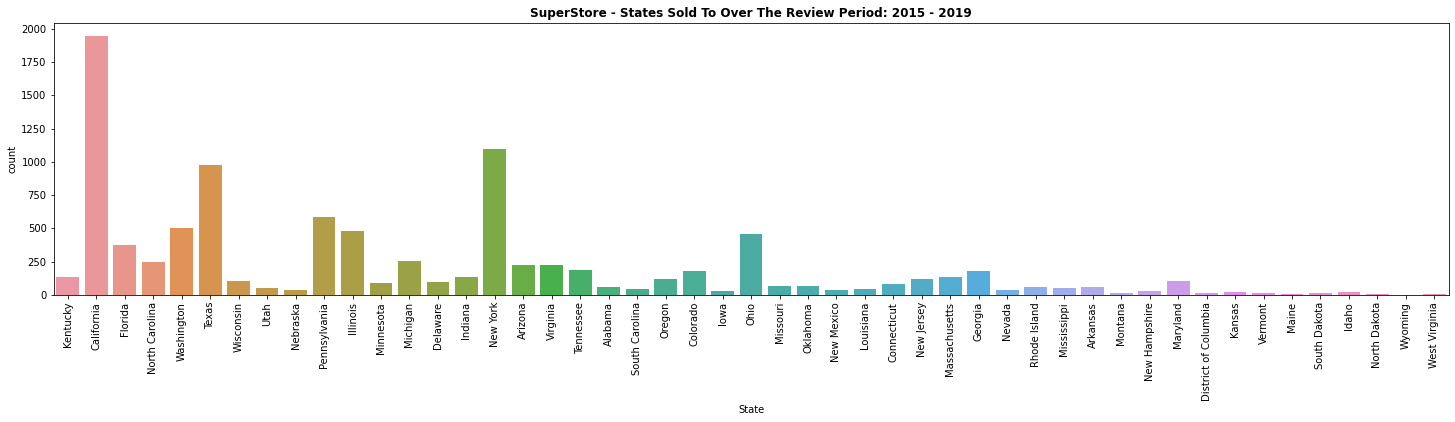

In [19]:
plt.figure(figsize=(25,5)) #size of our plot
plt.title('SuperStore - States Sold To Over The Review Period: 2015 - 2019', fontsize=12, fontweight='bold') #plot title
plt.xticks(rotation='vertical') #orientation of the State names on the x-axis
sns.countplot(x=store_df['State']) #what to plot

With this we can already see which states seem to have more order coming from them and which have less. For example, it is visible that most of products have been sold to the States of California and New York; while less sales have gone to Wyoming and West Virginia States.

In [20]:
store_df['Region'].nunique()

4

The Store sales its products in 49 states that fall in 4 Regions. Later we will analysis the sales for each state and performance of each of the 4 regions

## 3.0: Sales Analysis

In this section we will divide our tasks inorder to query and visualize the following:

-  Sales Trends Over Specified Duractions (Years and Months)
-  The Store's Top Customers
-  Sales Based on Cities, Regions, Categories, Sub-Category (City with highest and lowest sales)
-  Average days taken for Order fullfilment i.e, from Order Date to Ship Date. Is it dependent on Shipping Mode?
-  Product Performances
-  Losses (Profit < 0)
-  Correlations between Columns e.g., Discount and Profit among others

In [21]:
store_df.columns #refresh our mind on our dataset's columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
store_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### 3.1: What Duration does our Dataset Fall in?

In order to get a better analysis of our date we will need some additional columns:
-  Order Year
-  Ship Year
-  Order Month
-  Ship Month
-  Day Of Week the Order or Shipping happened

Later when querying Order Fullfilment we will also need a column to capture the number of days it takes to fullfil an order (Difference between 'Order Date' and 'Ship Date').

#### 3.1.1: Getting the Years from the Dates

To achieve this we will use the dt.year method. You can also use the dt.strftime ('%Y') method for the same result.
Checking back on our dataframe, the datatype for 'Order Date' and 'Ship Date' were object; we need to change that to datetime datatype

In [23]:
store_df['Order Date'] = pd.to_datetime(store_df['Order Date']) #changing datatype format to datetime
store_df['Ship Date'] = pd.to_datetime(store_df['Ship Date'])

In [24]:
store_df.info() #lets check to see if the datatype for the selected columns changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9800 non-null   int64         
 1   Order ID      9800 non-null   object        
 2   Order Date    9800 non-null   datetime64[ns]
 3   Ship Date     9800 non-null   datetime64[ns]
 4   Ship Mode     9800 non-null   object        
 5   Customer ID   9800 non-null   object        
 6   Segment       9800 non-null   object        
 7   Country       9800 non-null   object        
 8   City          9800 non-null   object        
 9   State         9800 non-null   object        
 10  Postal Code   9800 non-null   float64       
 11  Region        9800 non-null   object        
 12  Product ID    9800 non-null   object        
 13  Category      9800 non-null   object        
 14  Sub-Category  9800 non-null   object        
 15  Product Name  9800 non-null   object  

In [25]:
store_df['Order Year'] = store_df['Order Date'].dt.year #creates a new column with the value for the Year of the Order
store_df['Shipping Year'] = store_df['Ship Date'].dt.year #creates a new column with the value for the Year of the Shipping
store_df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Shipping Year
7131,7132,CA-2018-141439,2018-11-26,2018-01-12,Standard Class,TT-21460,Home Office,United States,Richmond,Indiana,...,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,257.94,3,0.0,67.0644,2018,2018
2943,2944,CA-2018-126242,2018-11-19,2018-11-24,Standard Class,MC-18100,Consumer,United States,Los Angeles,California,...,OFF-ST-10000675,Office Supplies,Storage,"File Shuttle II and Handi-File, Black",305.01,9,0.0,76.2525,2018,2018


We successfully added 'Order Year' and 'Shipping Year' to our dataframe. 
This will allow us to later focus on specific years and/or analysis trends over the years.
Lets see the years present in our dataframe.


In [26]:
print(store_df['Shipping Year'].unique()) #using the .unique() method to see the years our dataset spans

[2017 2016 2015 2018 2019]


The SuperStore dataset being analysed falls in the years 2015 to 2019

Let's proceed to add the months of each order and shipment to our dataframe using the .dt.month_name() method. Alternatively you could use .dt.to_period('M')

In [27]:
store_df['Order Month'] = store_df['Order Date'].dt.month_name() #new column Order Month
store_df['Shipping Month'] = store_df['Order Date'].dt.month_name() #new column Shipping Month
store_df[['Sales','Order Month','Order Year']].to_csv("data/SalesMonths-Years.csv") #lets save our new dataset to a csv file but only with the sales, months and year columns


In [28]:
store_df.sample(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Shipping Year,Order Month,Shipping Month
6919,6920,CA-2016-102806,2016-05-21,2016-05-28,Standard Class,HG-14965,Corporate,United States,Philadelphia,Pennsylvania,...,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",24.588,2,0.7,-18.0312,2016,2016,May,May


The reason behind extracting the Years and Months for each sale is to enable the Store to take note of the sales trends and months when sales were higher and lower, and even attribute internal or external reasons for those. Maybe Sales are higher on festival months, maybe Sales were lower in a specific month of 2018 because of a local or international event that affected Customers' purchases. We can then analysis how the months perform, if there is any pattern and even do a time series analysis and forecast sales. 

Let's plot some pivot tables of Sales (Number and Total Revenue) for the Months and Year(s).

In [29]:
# our pivot table with the total amount generated from Sales
total_sales_table = pd.pivot_table(store_df, values='Sales', index='Order Year', columns='Order Month', aggfunc='sum', margins=True).round(2)
total_sales_table

Order Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Order Year,,,,,,,,,,,,,
2015,24710.02,37349.27,63568.31,12588.48,28828.25,35194.56,29181.33,54027.69,29520.49,64369.46,34561.95,65956.40,479856.21
2016,38056.97,49076.93,52891.88,20728.35,29347.39,28573.31,28515.91,34489.68,30761.56,50009.14,31631.89,65353.00,459436.01
2017,42368.05,45766.81,72847.09,48907.59,38048.18,41761.94,37424.68,48990.14,64836.25,66392.55,52156.96,40692.31,600192.55
2018,37849.22,75408.78,56959.24,48928.83,59767.09,53942.78,46912.85,74748.62,40882.45,87997.64,65501.16,73153.36,722052.02
All,142984.25,207601.79,246266.52,131153.26,155990.92,159472.59,142034.77,212256.13,166000.75,268768.79,183851.96,245155.07,2261536.78


the pivot table above clearly shows as the Sales/Revenue totals in every month for every year present in the dataset, which the *margins=True* parameter adding the 'All' column for Totals of every year. All rounded off to 2 decimal places.

In [30]:
# using the count paramter to get the number of sales done in each year. The totals in the 'All' column should be equal to the total rows in the dataframe - 9800
no_of_sales_table = pd.pivot_table(store_df, values='Sales', index='Order Year', columns='Order Month', aggfunc='count', margins=True).round(2)
no_of_sales_table

Order Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Order Year,,,,,,,,,,,,,
2015,121,145,240,84,126,154,135,161,146,258,145,238,1953
2016,159,170,240,102,86,128,149,144,174,279,153,271,2055
2017,186,236,264,122,154,201,180,190,257,288,231,225,2534
2018,225,248,321,228,209,241,220,302,241,369,272,382,3258
All,691,799,1065,536,575,724,684,797,818,1194,801,1116,9800


We are now able to see the number of Sales that have happened over the years. It is observable that more sells happen in November and less in February, which each year having an increase number of sales done. We can visualize by ploting a heatmap.

In [31]:
no_of_sales_table2 = no_of_sales_table.drop(columns=('All')) #drop the column 'All' it will affect the value scale of the heatmap, since its a Sum column
no_of_sales_table2 = no_of_sales_table2.drop(index=('All')) #drop the index 'All' it will affect the value scale of the heatmap for the same reason
no_of_sales_table2 #our new sales dataframe for the heatmap visualizations


Order Month,April,August,December,February,January,July,June,March,May,November,October,September
Order Year,,,,,,,,,,,,
2015,121,145,240,84,126,154,135,161,146,258,145,238
2016,159,170,240,102,86,128,149,144,174,279,153,271
2017,186,236,264,122,154,201,180,190,257,288,231,225
2018,225,248,321,228,209,241,220,302,241,369,272,382


<AxesSubplot: title={'center': 'SuperStore - Number of Sales Each Month for the Review Period: 2015 - 2019'}, xlabel='Order Month', ylabel='Order Year'>

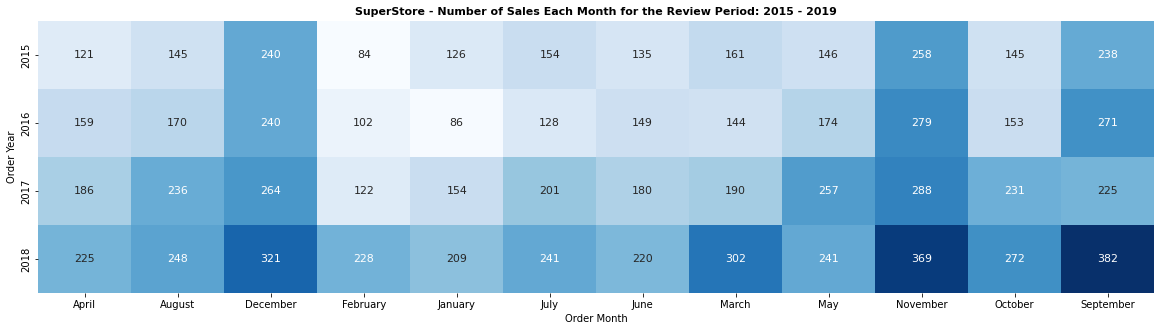

In [32]:
plt.figure(figsize=(20,5)) #size of plot
plt.title('SuperStore - Number of Sales Each Month for the Review Period: 2015 - 2019', fontsize=11, fontweight='bold') #title
sns.heatmap(no_of_sales_table2, cmap='Blues', annot=True, annot_kws={"size":11}, fmt="d", cbar=False) #the plot. annotation true, colors for map are Blues, and color bar disabled

The lighter the shade of blue the less the Number of Sales that year for the corresponding month. We can then observe that September 2018 had the most Number of Sales in the review period; and February 2015 had the lowest Number of Sales.

We can also confirm the yearly total Revenue by creating a pivot table for Sales and Years only.

In [33]:
year_sales_table = pd.pivot_table(store_df, 'Sales', index='Order Year', aggfunc=['sum', 'mean']).round(2)
year_sales_table 

,sum,mean
,Sales,Sales
Order Year,,
2015,479856.21,245.70
2016,459436.01,223.57
2017,600192.55,236.86
2018,722052.02,221.62


### 3.2: Who Are The Top Customers of The Store?

We had previously removed the 'Customer Name' column from our dataframe so for this query we will use the 'Customer ID' column to find out who are the top customers of the store based off of the Sales. Maybe the store can throw in rewards for them.

In [34]:
top_ten_customers = store_df.groupby(['Customer ID']).sum().sort_values("Sales", ascending=False).head(10) #sort Customers based on Sales
top_ten_customers = top_ten_customers[['Sales']].round(2) #round off Sales to the nearest 2 decimal points
top_ten_customers.reset_index(inplace=True) #set Customer ID as a column and create a new index for this 'top_ten_customers' dataframe
top_ten_customers #view the top 10 customers

,Customer ID,Sales
0,SM-20320,25043.05
1,TC-20980,19052.22
2,RB-19360,15117.34
3,TA-21385,14595.62
4,AB-10105,14473.57
5,KL-16645,14175.23
6,SC-20095,14142.33
7,HL-15040,12873.30
8,SE-20110,12209.44
9,CC-12370,12129.07


plot for this query

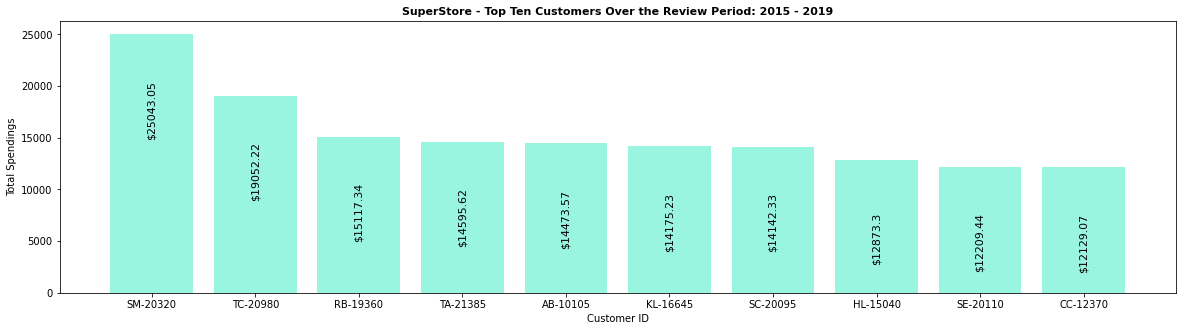

In [35]:
plt.figure(figsize=(20, 5)) #size of the plot
plt.bar(top_ten_customers['Customer ID'], top_ten_customers['Sales'], color='#99f5e0') #what to plot
plt.title('SuperStore - Top Ten Customers Over the Review Period: 2015 - 2019', fontsize=11, fontweight='bold') #title of out plot
plt.xlabel('Customer ID') #our axis labels
plt.ylabel('Total Spendings') 
for i, j in top_ten_customers['Sales'].items(): #our index, values and enumerator
    plt.text(i, j-10000, '$'+str(j), fontsize=11, rotation='vertical', horizontalalignment='center'); #annotation of Sales values in each bar and specifying the position of the values